Q2 Rare-class Classification Using the Southern German Credit Data Set 
Data Website: https://archive.ics.uci.edu/ml/datasets/South+German+Credit
(A version of the dataset with labels in English is also available on Canvas)
The goal of this exercise is to explore the impact of rare class on classification. The dataset has 700 good credit scores and 300 bad credit scores. 

a)	Build a model with the whole dataset

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the data from file 
df = pd.read_csv("/Users/sahana/Downloads/Important/CSS581-HW2/SouthGermanCredit.csv")

In [3]:
# creating different copies of data set for further use.
df = df.sample(frac = 1)
df.columns
data1 = df
part4 = df

In [4]:
# Checking for null values.
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 61 to 204
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   1000 non-null   int64
 1   duration                 1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   amount                   1000 non-null   int64
 5   savings                  1000 non-null   int64
 6   employment_duration      1000 non-null   int64
 7   installment_rate         1000 non-null   int64
 8   personal_status_sex      1000 non-null   int64
 9   other_debtors            1000 non-null   int64
 10  present_residence        1000 non-null   int64
 11  property                 1000 non-null   int64
 12  age                      1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  numb

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [5]:
# Checking for duplicate data
df.duplicated().any()

False

In [6]:
# data exploration to count the credit scores with respect to the personal_status_sex class.
df.groupby(['personal_status_sex', 'credit_risk'])[['credit_risk']].count()

credit_risk
personal_status_sex credit_risk             
1                   0                     20
                    1                     30
2                   0                    109
                    1                    201
3                   0                    146
                    1                    402
4                   0                     25
                    1                     67

<AxesSubplot:xlabel='personal_status_sex', ylabel='Count'>

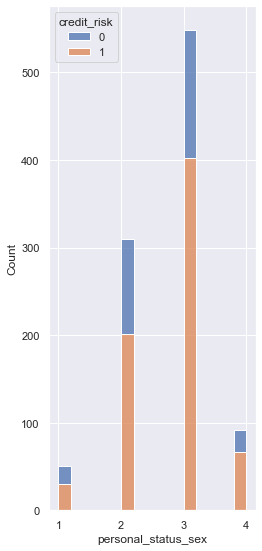

In [7]:
# data exploration to count the credit scores with respect to the personal_status_sex class.
sns.set(rc={'figure.figsize':(3.7,9.27)})
sns.histplot(data=df, x='personal_status_sex', stat='count', hue='credit_risk', multiple='stack')

In [8]:
# Creating X and Y variables to build the model with the entire dataset

data = df
y = data['credit_risk']
X = data.drop('credit_risk',axis=1)

In [9]:
# a) Build a model with the whole dataset using cross validation.
from sklearn.model_selection import *
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [10]:
# a) Build a model with the whole dataset. 
# Calculated the values of precision, recall, accuracy, f1 score using XGBoost algorithm
import xgboost as xgb

Accuracy_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='error'),
                                    X,y, cv=skf, scoring="accuracy")
print("The Accuracy for  XGBOOST model is:")
print(Accuracy_XGBoost)
print("The Mean Accuracy for  XGBOOST model is:" + str(Accuracy_XGBoost.mean()))


Precision_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='error'),
                                    X,y, cv=skf, scoring="precision")
print("\n The Precision for  XGBOOST model is:")
print(Precision_XGBoost)
print("The Mean Precision for  XGBOOST model is:" + str(Precision_XGBoost.mean()))


Recall_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='error'),
                                 X, y,cv=skf, scoring="recall")

print("\n The Recall for XGBOOST model is:")
print(Recall_XGBoost)
print("The Mean Recall for XGBOOST model is:" + str(Recall_XGBoost.mean()))

FScore_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='error'),
                                 X,y, cv=skf, scoring="f1")

print("\n The Fscore for XGBOOST  model is:")
print(FScore_XGBoost)
print("The mean Fscore for XGBOOST model is:" + str(FScore_XGBoost.mean()))


The Accuracy for  XGBOOST model is:
[0.74 0.79 0.65 0.84 0.75 0.71 0.69 0.71 0.77 0.75]
The Mean Accuracy for  XGBOOST model is:0.74

 The Precision for  XGBOOST model is:
[0.78205128 0.78823529 0.74647887 0.86486486 0.79220779 0.76623377
 0.77464789 0.75949367 0.79012346 0.8358209 ]
The Mean Precision for  XGBOOST model is:0.7900157783237319

 The Recall for XGBOOST model is:
[0.87142857 0.95714286 0.75714286 0.91428571 0.87142857 0.84285714
 0.78571429 0.85714286 0.91428571 0.8       ]
The Mean Recall for XGBOOST model is:0.8571428571428573

 The Fscore for XGBOOST  model is:
[0.82432432 0.86451613 0.75177305 0.88888889 0.82993197 0.80272109
 0.78014184 0.80536913 0.84768212 0.81751825]
The mean Fscore for XGBOOST model is:0.8212866791984241


<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-11-f18e1944014e>:29: DeprecationWarning: scipy.interp i

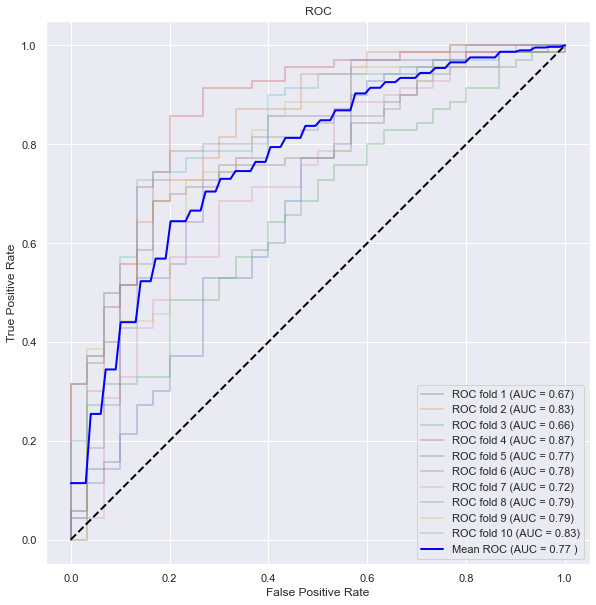

In [11]:
# a) Build a model with the whole dataset. 
# Calculated the AUC and ploted the ROC curve.

from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd

clf = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
cv = StratifiedKFold(n_splits=10,shuffle=False)

y = df['credit_risk']
x = df.drop('credit_risk',axis=1)
fig1 = plt.figure(figsize=[12,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Q 2b)	Build another model by reducing the number of instances from the bad scores to:
(i) 150 instances (ii) 30 instances (iii) 10 instances 


In [12]:
# Total number bad scores in the data set ie credit_risk == 0 
df.query('credit_risk == 0').count()

status                     300
duration                   300
credit_history             300
purpose                    300
amount                     300
savings                    300
employment_duration        300
installment_rate           300
personal_status_sex        300
other_debtors              300
present_residence          300
property                   300
age                        300
other_installment_plans    300
housing                    300
number_credits             300
job                        300
people_liable              300
telephone                  300
foreign_worker             300
credit_risk                300
dtype: int64

In [13]:
data = df

In [14]:
# Q 2b) Build another model by reducing the number of instances from the bad scores to: (i) 150 instances 
# quering for 150 samples with credit_risk == 0 i.e 150 bad samples
data_credit_risk_bad = df.query('credit_risk == 0').sample(n = 150)
data_credit_risk_bad

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
999,1,30,2,2,6350,5,5,4,3,1,...,2,31,3,2,1,3,2,1,2,0
924,1,21,3,6,3414,1,2,2,3,1,...,2,26,2,2,2,3,2,1,2,0
865,3,15,4,3,1271,5,3,3,3,1,...,4,39,3,3,2,3,2,2,2,0
751,1,9,2,0,654,1,3,4,3,1,...,3,28,3,2,1,2,2,1,2,0
826,2,48,0,9,3844,2,4,4,3,1,...,4,34,3,3,1,2,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1,60,2,9,7297,1,5,4,3,2,...,4,36,3,1,1,3,2,1,2,0
778,2,18,4,3,1245,1,3,4,4,1,...,3,33,3,2,1,3,2,1,2,0
866,2,12,2,0,1295,1,2,3,2,1,...,3,25,3,1,1,3,2,1,2,0
171,1,12,2,0,1228,1,3,4,2,1,...,1,24,3,2,1,2,2,1,2,0


In [15]:
# Selecting all good samples
data_credit_risk_good = df.query('credit_risk == 1')

In [16]:
# concatinating the good and bad credit_risk samples i.e 150 bad credit_risk samples and 700 good credit_risk samples
result = pd.concat([data_credit_risk_bad, data_credit_risk_good])
data_result = result

In [17]:
y = result['credit_risk']
X = result.drop('credit_risk',axis=1)

In [18]:
# Using XGboost algorithm to build the model with 150 instances
import xgboost as xgb
Precision_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                    X,y, cv=skf, scoring="precision")
print("The Precision for  XGBOOST model is:")
print(Precision_XGBoost)
print("The Mean Precision for  XGBOOST model is:" + str(Precision_XGBoost.mean()))


Recall_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X, y,cv=skf, scoring="recall")

print("\n The Recall for XGBOOST model is:")
print(Recall_XGBoost)
print("The Mean Recall for XGBOOST model is:" + str(Recall_XGBoost.mean()))

FScore_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X,y, cv=skf, scoring="f1")

print("\n The Fscore for XGBOOST  model is:")
print(FScore_XGBoost)
print("The mean Fscore for XGBOOST model is:" + str(FScore_XGBoost.mean()))


The Precision for  XGBOOST model is:
[0.85526316 0.87179487 0.84210526 0.84810127 0.86075949 0.87012987
 0.87179487 0.86666667 0.84615385 0.85714286]
The Mean Precision for  XGBOOST model is:0.8589912164229286

 The Recall for XGBOOST model is:
[0.92857143 0.97142857 0.91428571 0.95714286 0.97142857 0.95714286
 0.97142857 0.92857143 0.94285714 0.85714286]
The Mean Recall for XGBOOST model is:0.9400000000000001

 The Fscore for XGBOOST  model is:
[0.89041096 0.91891892 0.87671233 0.89932886 0.91275168 0.91156463
 0.91891892 0.89655172 0.89189189 0.85714286]
The mean Fscore for XGBOOST model is:0.8974192761444844


<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-19-04cb835c332b>:27: DeprecationWarning: scipy.interp i

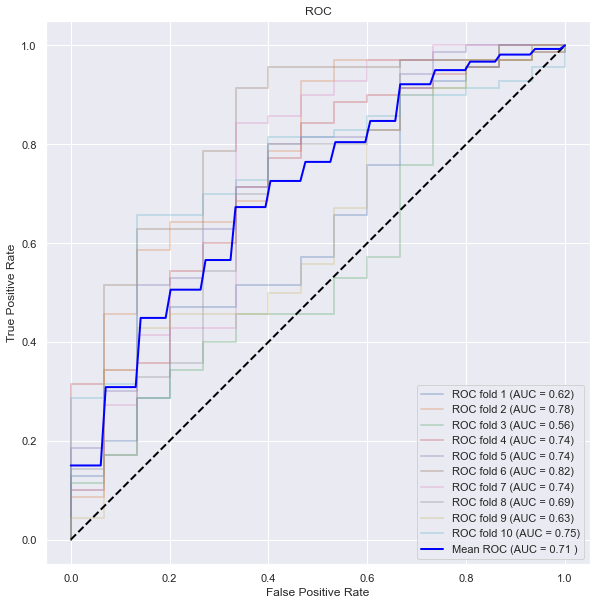

In [19]:
# Using XGboost algorithm to build the model with 150 instances . AUC for 150 instances of bad score
from sklearn.datasets import make_blobs
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import KFold
import matplotlib.pylab as plt
from scipy import interp
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import numpy as np # linear algebra
import pandas as pd

clf = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
cv = StratifiedKFold(n_splits=10,shuffle=False)

y = data_result['credit_risk']
x = data_result.drop('credit_risk',axis=1)
fig1 = plt.figure(figsize=[12,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Q2 b)	Build another model by reducing the number of instances from the bad scores to:
(ii) 30 instances.


In [20]:
data_credit_risk_bad = df.query('credit_risk == 0').sample(n = 30)
data_credit_risk_bad

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
789,2,24,4,2,4736,1,2,2,2,1,...,3,25,1,2,1,2,2,1,2,0
542,2,12,2,2,1922,1,3,4,3,1,...,2,37,3,2,1,2,2,1,2,0
798,1,24,2,0,915,5,5,4,2,1,...,3,29,1,2,1,3,2,1,2,0
521,4,36,2,2,10974,1,1,4,2,1,...,3,26,3,2,2,4,2,2,2,0
862,2,12,2,3,1534,1,2,1,4,1,...,1,23,3,1,1,3,2,1,2,0
832,4,36,3,9,7980,5,2,4,3,1,...,3,27,3,1,2,3,2,2,2,0
853,3,24,4,0,1344,5,4,4,3,1,...,1,37,1,2,2,2,1,1,2,0
599,1,36,2,2,5179,1,4,4,3,1,...,2,29,3,2,1,3,2,1,2,0
968,1,45,2,3,1845,1,3,4,3,1,...,4,23,3,3,1,3,2,2,2,0
904,1,18,0,2,3114,1,2,1,2,1,...,2,26,3,1,1,3,2,1,2,0


In [21]:
data_credit_risk_good = df.query('credit_risk == 1')
result = pd.concat([data_credit_risk_bad, data_credit_risk_good])
data_result1 = result

In [22]:
y = result['credit_risk']
X = result.drop('credit_risk',axis=1)

In [23]:
# Using XGboost algorithm to build the model with 30 bad score instances . 
import xgboost as xgb
Precision_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                    X,y, cv=skf, scoring="precision")
print("The Precision for  XGBOOST model is:")
print(Precision_XGBoost)
print("The Mean Precision for  XGBOOST model is:" + str(Precision_XGBoost.mean()))


Recall_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X, y,cv=skf, scoring="recall")

print("\n The Recall for XGBOOST model is:")
print(Recall_XGBoost)
print("The Mean Recall for XGBOOST model is:" + str(Recall_XGBoost.mean()))

FScore_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X,y, cv=skf, scoring="f1")

print("\n The Fscore for XGBOOST  model is:")
print(FScore_XGBoost)
print("The mean Fscore for XGBOOST model is:" + str(FScore_XGBoost.mean()))


The Precision for  XGBOOST model is:
[0.95774648 0.95833333 0.95890411 0.95890411 0.95890411 0.95833333
 0.95833333 0.95890411 0.95833333 0.95890411]
The Mean Precision for  XGBOOST model is:0.9585600360151778

 The Recall for XGBOOST model is:
[0.97142857 0.98571429 1.         1.         1.         0.98571429
 0.98571429 1.         0.98571429 1.        ]
The Mean Recall for XGBOOST model is:0.9914285714285714

 The Fscore for XGBOOST  model is:
[0.96453901 0.97183099 0.97902098 0.97902098 0.97902098 0.97183099
 0.97183099 0.97902098 0.97183099 0.97902098]
The mean Fscore for XGBOOST model is:0.9746967845859066


<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-24-6e92b058152f>:16: DeprecationWarning: scipy.interp i

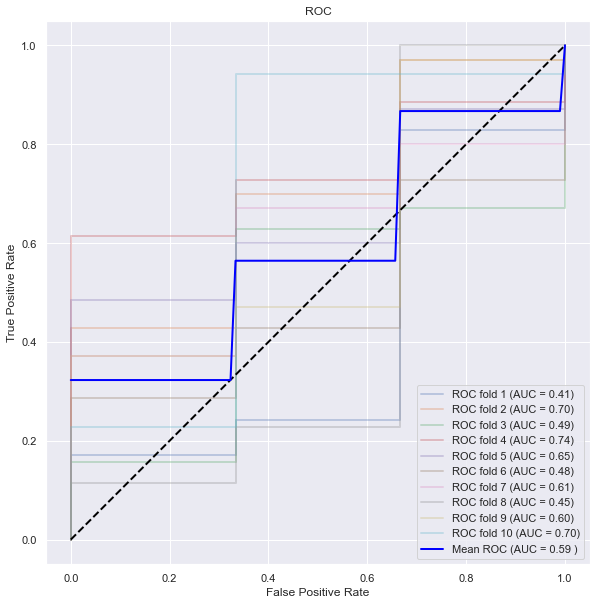

In [24]:
#AUC for 30 instances of bad score
clf = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
cv = StratifiedKFold(n_splits=10,shuffle=False)

y = data_result1['credit_risk']
x = data_result1.drop('credit_risk',axis=1)
fig1 = plt.figure(figsize=[12,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Q2 b) Build another model by reducing the number of instances from the bad scores to: (iii) 10 instances.

In [25]:
data_credit_risk_bad = df.query('credit_risk == 0').sample(n = 10)
data_credit_risk_bad

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
920,1,24,1,2,3552,1,4,3,3,1,...,3,27,1,2,1,3,2,1,2,0
758,2,30,2,0,2150,1,3,4,2,3,...,4,24,1,2,1,3,2,1,2,0
826,2,48,0,9,3844,2,4,4,3,1,...,4,34,3,3,1,2,1,1,2,0
828,2,12,2,5,639,1,3,4,3,1,...,3,30,3,2,1,3,2,1,2,0
949,4,12,4,3,797,5,5,4,2,1,...,2,33,3,2,1,2,1,1,2,0
893,1,18,2,2,1131,1,1,4,2,1,...,3,33,3,2,1,3,2,1,2,0
540,2,9,2,3,1670,1,2,4,2,1,...,3,22,3,2,1,3,2,2,2,0
943,2,36,2,0,12389,5,3,1,3,1,...,4,37,1,3,1,3,2,2,2,0
827,1,12,4,0,4843,1,5,3,3,2,...,2,43,3,1,2,3,2,2,2,0
810,2,48,2,9,15672,1,3,2,3,1,...,3,23,3,2,1,3,2,2,2,0


In [26]:
data_credit_risk_good = df.query('credit_risk == 1')

In [27]:
data_credit_risk_bad = df.query('credit_risk == 0').sample(n = 10)
data_credit_risk_bad
result = pd.concat([data_credit_risk_bad, data_credit_risk_good])
data_result2 = result

In [28]:
y = result['credit_risk']
X = result.drop('credit_risk',axis=1)

In [29]:
# Using XGboost algorithm to build the model with 10 bad score instances . 
import xgboost as xgb
Precision_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                    X,y, cv=skf, scoring="precision")
print("The Precision for  XGBOOST model is:")
print(Precision_XGBoost)
print("The Mean Precision for  XGBOOST model is:" + str(Precision_XGBoost.mean()))


Recall_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X, y,cv=skf, scoring="recall")

print("\n The Recall for XGBOOST model is:")
print(Recall_XGBoost)
print("The Mean Recall for XGBOOST model is:" + str(Recall_XGBoost.mean()))

FScore_XGBoost = cross_val_score(xgb.XGBClassifier(use_label_encoder =False, eval_metric='logloss'),
                                 X,y, cv=skf, scoring="f1")

print("\n The Fscore for XGBOOST  model is:")
print(FScore_XGBoost)
print("The mean Fscore for XGBOOST model is:" + str(FScore_XGBoost.mean()))


The Precision for  XGBOOST model is:
[0.98591549 0.98591549 0.98591549 0.98591549 0.98591549 0.98571429
 0.98591549 0.98591549 0.98591549 0.98591549]
The Mean Precision for  XGBOOST model is:0.9858953722334004

 The Recall for XGBOOST model is:
[1.         1.         1.         1.         1.         0.98571429
 1.         1.         1.         1.        ]
The Mean Recall for XGBOOST model is:0.9985714285714286

 The Fscore for XGBOOST  model is:
[0.9929078  0.9929078  0.9929078  0.9929078  0.9929078  0.98571429
 0.9929078  0.9929078  0.9929078  0.9929078 ]
The mean Fscore for XGBOOST model is:0.9921884498480245


<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
<ipython-input-30-b627ee2f2e18>:16: DeprecationWarning: scipy.interp i

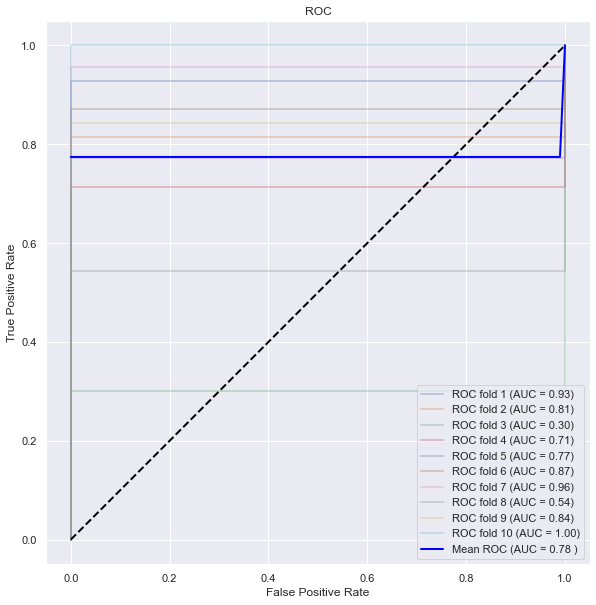

In [30]:
# Using XGboost algorithm to build the model with 10 bad score instances . 
clf = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
cv = StratifiedKFold(n_splits=10,shuffle=False)

y = data_result2['credit_risk']
x = data_result2.drop('credit_risk',axis=1)
fig1 = plt.figure(figsize=[12,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
for train,test in cv.split(x,y): 
    prediction = clf.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test])
    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Q2c c)	Build a model with using training data from personal_status_sex: non-single or male : single only but predict on the whole dataset. Break down your results by famges variable

Accuracy:0.7419354838709677
Precision:0.8205128205128205
Recall:0.7804878048780488
f1 score:0.8


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


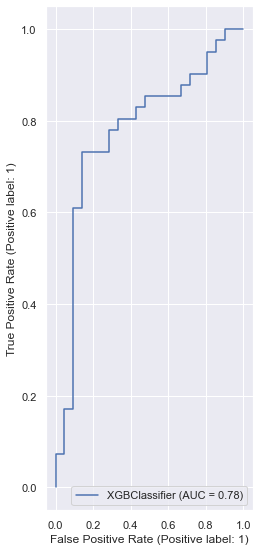

In [31]:
# Training the data with famges variable = 2 and testing for femges variable = 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import metrics

data_femgas_2 = data1.query('personal_status_sex == 2')
y_femgas_2 = data_femgas_2['credit_risk']
x_femgas_2 = data_femgas_2.drop('credit_risk',axis=1)
 
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_femgas_2, y_femgas_2, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
model.fit(X_train_2, y_train_2)

y_pred = model.predict(X_test_2)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test_2, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_2, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_2, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_2, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model, X_test_2, y_test_2) 
plt.show()

Accuracy:0.56
Precision:0.6111111111111112
Recall:0.7333333333333333
f1 score:0.6666666666666666


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


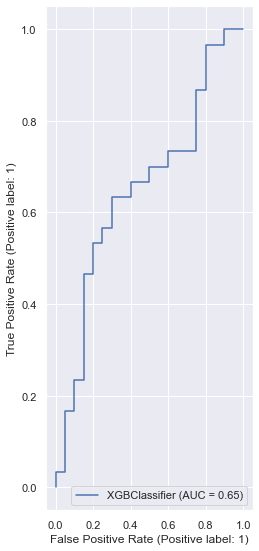

In [32]:
# testing for femges variable = 1
data_femgas_1 = data1.query('personal_status_sex == 1')
y_test_femgas_1 = data_femgas_1['credit_risk']
x_test_femgas_1 = data_femgas_1.drop('credit_risk',axis=1)

y_pred = model.predict(x_test_femgas_1)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_1, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_1, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_1, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_1, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model, x_test_femgas_1, y_test_femgas_1) 
plt.show()

Accuracy:0.7390510948905109
Precision:0.8245614035087719
Recall:0.818407960199005
f1 score:0.8214731585518101


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


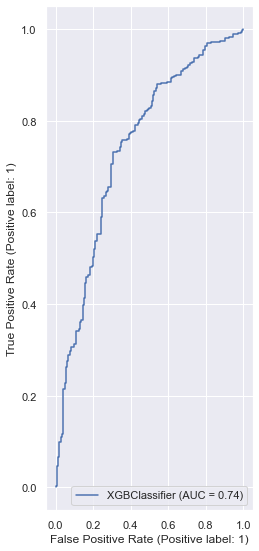

In [33]:
# testing for femges variable = 3
data_femgas_3 = data1.query('personal_status_sex == 3')
y_test_femgas_3 = data_femgas_3['credit_risk']
x_test_femgas_3 = data_femgas_3.drop('credit_risk',axis=1)
y_pred = model.predict(x_test_femgas_3)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_3, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_3, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_3, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_3, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model, x_test_femgas_3, y_test_femgas_3) 
plt.show()

Accuracy:0.6630434782608695
Precision:0.8
Recall:0.7164179104477612
f1 score:0.7559055118110236


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


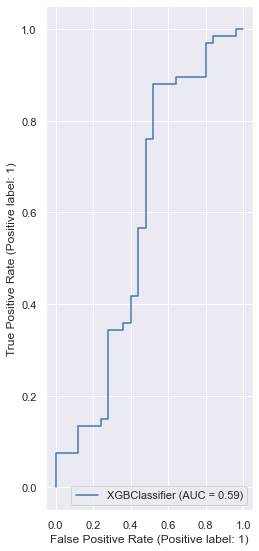

In [34]:
# testing for femges variable = 4
data_femgas_4 = data1.query('personal_status_sex == 4')
y_test_femgas_4 = data_femgas_4['credit_risk']
x_test_femgas_4 = data_femgas_4.drop('credit_risk',axis=1)
y_pred = model.predict(x_test_femgas_4)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_4, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_4, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_4, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_4, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model, x_test_femgas_4, y_test_femgas_4) 
plt.show()

Q2d Build a model with using training data from female single but predict on the whole dataset. Break down your results by personal_status_sex variable

Accuracy:0.6842105263157895
Precision:0.75
Recall:0.75
f1 score:0.75


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


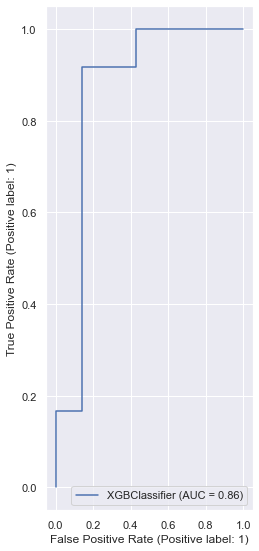

In [35]:
# Training the data with famges variable = 4 and testing for femges variable = 4
from sklearn.model_selection import train_test_split
import xgboost as xgb
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import metrics

data_femgas_4 = part4.query('personal_status_sex == 4')
y_femgas_4 = data_femgas_4['credit_risk']
x_femgas_4 = data_femgas_4.drop('credit_risk',axis=1)
 
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(x_femgas_4, y_femgas_4, test_size=0.2, random_state=42)

# model_4 = model = LogisticRegression()
model_4 = xgb.XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
model_4.fit(X_train_4, y_train_4)

y_pred = model_4.predict(X_test_4)
predictions = [round(value) for value in y_pred]


accuracy = accuracy_score(y_test_4, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_4, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_4, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_4, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model, X_test_4, y_test_4) 
plt.show()

Accuracy:0.56
Precision:0.625
Recall:0.6666666666666666
f1 score:0.6451612903225806


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


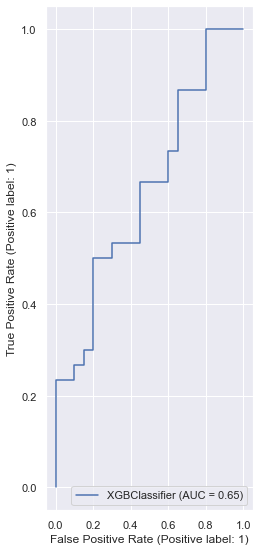

In [36]:
# testing for femges variable = 1
data_femgas_1 = part4.query('personal_status_sex == 1')
y_test_femgas_1 = data_femgas_1['credit_risk']
x_test_femgas_1 = data_femgas_1.drop('credit_risk',axis=1)

y_pred = model_4.predict(x_test_femgas_1)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_1, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_1, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_1, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_1, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model_4, x_test_femgas_1, y_test_femgas_1) 
plt.show()

Accuracy:0.6709677419354839
Precision:0.72
Recall:0.8059701492537313
f1 score:0.7605633802816901


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


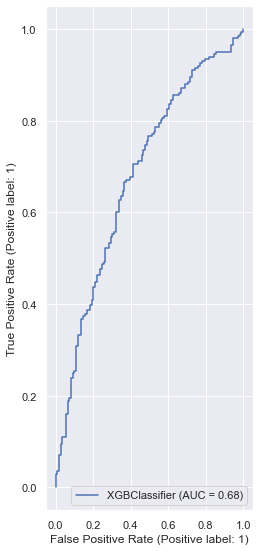

In [37]:
# testing for femges variable = 2
data_femgas_2 = part4.query('personal_status_sex == 2')
y_test_femgas_2 = data_femgas_2['credit_risk']
x_test_femgas_2 = data_femgas_2.drop('credit_risk',axis=1)
y_pred = model_4.predict(x_test_femgas_2)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_2, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_2, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_2, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_2, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model_4, x_test_femgas_2, y_test_femgas_2) 
plt.show()

Accuracy:0.7390510948905109
Precision:0.7923250564334086
Recall:0.8731343283582089
f1 score:0.8307692307692307


/Users/sahana/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


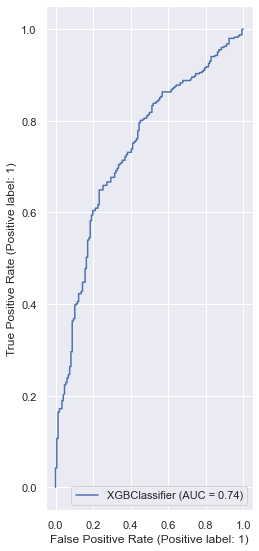

In [38]:
# testing for femges variable = 3
data_femgas_3 = part4.query('personal_status_sex == 3')
y_test_femgas_3 = data_femgas_3['credit_risk']
x_test_femgas_3 = data_femgas_3.drop('credit_risk',axis=1)
y_pred = model_4.predict(x_test_femgas_3)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test_femgas_3, predictions)
print("Accuracy:" + str(accuracy))

precision = precision_score(y_test_femgas_3, predictions)
print("Precision:" + str(precision))

recall = recall_score(y_test_femgas_3, predictions)
print("Recall:" + str(recall))

f1=f1_score(y_test_femgas_3, predictions)
print("f1 score:" + str(f1))

# roc = skl.metrics.plot_roc_curve(model,X_test,y_test)
metrics.plot_roc_curve(model_4, x_test_femgas_3, y_test_femgas_3) 
plt.show()